In [1]:
import numpy as np
import sklearn
# we used the library sklearn here only to load the data

# You dont have to care about matplotlib for now
import matplotlib.pyplot as plt

# load data from sklearn
from sklearn.datasets import load_boston
data = load_boston()

# Take a quick look at the dataset.
Visualizing helps getting a feel of the trend of the data. No need to delve too hard into the actual code yet.

In [2]:
print(data.keys())
X= data.data
y = data.target
feature_names = data.feature_names
print('data.data :{0}, data.target: {1}, num_features: {2}'.format(X.shape, y.shape, len(feature_names)))
print('num_datapoints : {}'.format(X.shape[0]))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
data.data :(506, 13), data.target: (506,), num_features: 13
num_datapoints : 506


In [3]:
# https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_boston_prediction.html
def label_histogram():
    plt.figure(figsize=(6, 5))
    plt.hist(y)
    plt.xlabel('price ($1000s)')
    plt.ylabel('count')
    plt.tight_layout()

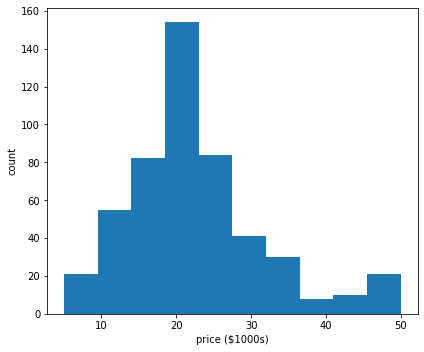

In [4]:
label_histogram()

In [5]:
## PLOTING PRCIES AGAINST EACH FEATURE
def price_single_feature_ploting(input_data, feature_names):
    fig, axes = plt.subplots(5, 3, figsize = (15, 15))
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    for index, (ax, feature_name) in enumerate(zip(axes.flat[:-2],feature_names)): 
        ax.scatter(input_data[:, index], y)
        ax.set(xlabel=feature_name, ylabel='Price')

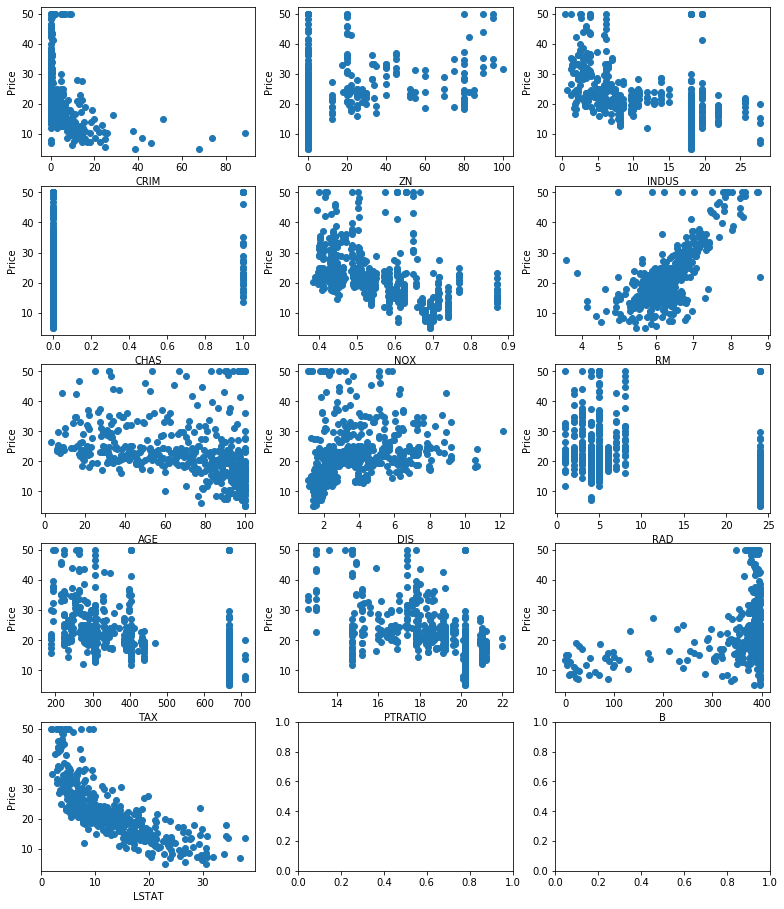

In [6]:
price_single_feature_ploting(X, feature_names)

# Learning the parameters (coefficients and intercept).
Homework: implement everywhere there is an ellipsis (`...`).

In [7]:
def training(X, y):
    """ find the coefficients and the intercept of the linear model which fit best to the dataset 
    X: is a the input matrix, which rows are examples and columns are features
    y: the target vector, which has length equals to the number of total examples in the dataset
    
    return:
    
    coefficients : which is a vector, lenght equals to number of features  
    intercept: a scalar (the bias)"""
    
    # add bias feature (all ones)
    X = np.hstack([np.ones((X.shape[0], 1)), X])
    # apply the formula
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    # this is also acceptable
    # theta = np.linalg.pinv(X) @ y
    return theta[1:], theta[0]

In [8]:
## your result should look like this (with a small error due to machine precision)
coefficients, intercept = training(X, y)
assert np.allclose(coefficients,
                   np.array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
                             -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
                             3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
                             -5.24758378e-01]))
assert np.allclose(intercept, 36.459488385090125)

# Evaluation
Similarly, fill in the blank.

In [9]:
def prediction(X, coefficients, intercept):
    """compute y_predict: the price prediction of our model for your input houses 
    X: is a the input matrix(N houses) or a vector (1 houses) , with columns are features
    coefficients and scalar: calculated above
    
    return:
    y_predict: a vector or scalar (equal to number of houses)
    """
    
    # make sure matrix dimensions align
    return X @ coefficients + intercept

In [10]:
# MSE evaluation
def MSE(X, y_target, coefficients, intercept):
    """Calculate the mean square error of your model
    X: is a the input matrix , which rows are examples and columns are features
    y_target : a vector,contains the true housing prices for all houses in the dataset
    coefficients and scalar: calculated above, used to compute y_predict
    
    return:
    MSE: a scalar"""
    
    # compute y_predict: the price prediction of our model for all houses
    #1 line of code
    y_predict = prediction(X, coefficients, intercept)
    
    # calculate MSE based on y_predict and y_target
    assert len(y_predict) == len(y_target)
    # 1 line of code
    MSE = np.mean((y_predict - y_target) ** 2)

    return MSE


In [11]:
## we expect your MSE on the housing dataset to look like this
mse = MSE(X, y, coefficients, intercept)
assert np.allclose(mse, 21.894831181729202)

# How good is your regressor?

In [12]:
## ploting to see our model
def visualize_results(y_predict, y_target):
    """ this function plot your y_predict and y_predict to see how closed they are"""
    
    plt.figure(figsize=(5, 4))
    plt.scatter(y_target, y_predict)
    plt.plot([0, 50], [0, 50], '--k')
    plt.axis('tight')
    plt.xlabel('True price ($1000s)')
    plt.ylabel('Predicted price ($1000s)')
    plt.tight_layout()

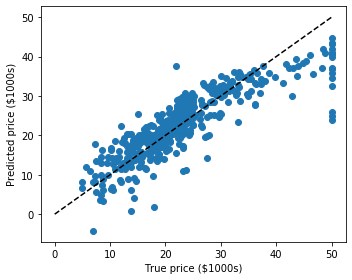

In [13]:
# run this function to see your result
visualize_results(prediction(X, coefficients, intercept), y)